In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

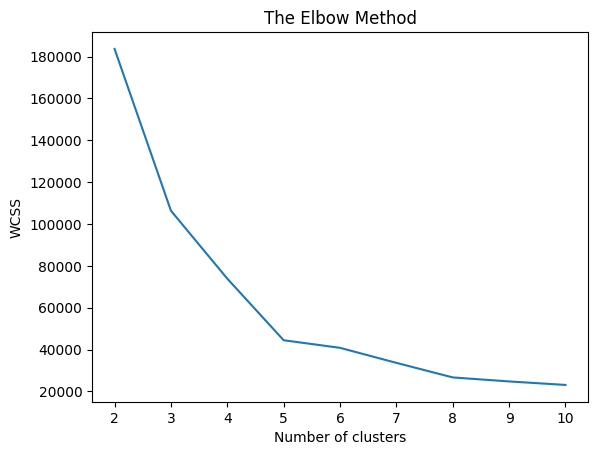

In [6]:
from sklearn.cluster import KMeans
list1 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
plt.plot(range(2, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
list1

[183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit(X)


In [9]:
y_kmeans

KMeans(n_clusters=5, random_state=42)

In [10]:
y_pred=kmeans.predict(X)

In [11]:
supervised=dataset

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
supervised['Cluster_group']=y_kmeans

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,"KMeans(n_clusters=5, random_state=42)"
1,2,Male,21,15,81,"KMeans(n_clusters=5, random_state=42)"
2,3,Female,20,16,6,"KMeans(n_clusters=5, random_state=42)"
3,4,Female,23,16,77,"KMeans(n_clusters=5, random_state=42)"
4,5,Female,31,17,40,"KMeans(n_clusters=5, random_state=42)"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"KMeans(n_clusters=5, random_state=42)"
196,197,Female,45,126,28,"KMeans(n_clusters=5, random_state=42)"
197,198,Male,32,126,74,"KMeans(n_clusters=5, random_state=42)"
198,199,Male,32,137,18,"KMeans(n_clusters=5, random_state=42)"


In [15]:
supervised.to_csv("cluster.csv",index=False)

In [16]:
centroids=kmeans.cluster_centers_

In [17]:
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [18]:
y_kmeans

KMeans(n_clusters=5, random_state=42)

C:\Users\user\anaconda3\envs\machinelearning\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


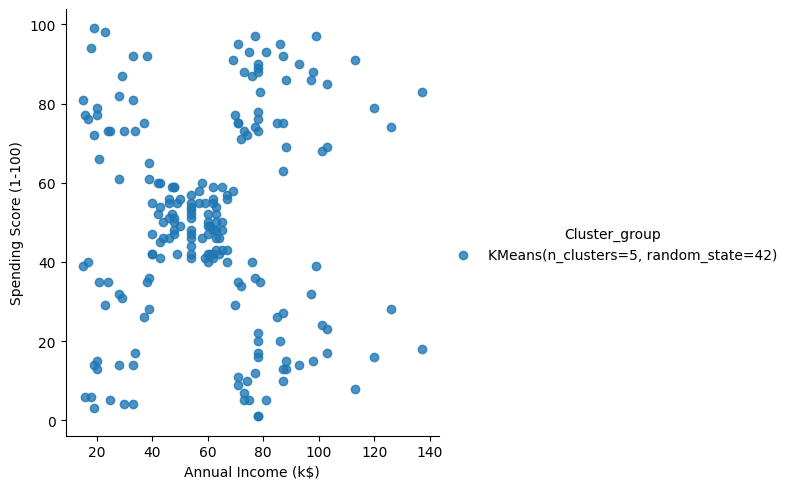

In [19]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [20]:

from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X,y_pred) 


In [21]:
silhouette_avg

np.float64(0.553931997444648)

In [22]:
import pickle
filename="finalized_model_K_Means.sav"

In [23]:
pickle.dump(y_kmeans,open(filename,'wb'))

In [24]:
loaded_model=pickle.load(open("finalized_model_K_Means.sav",'rb'))
result=loaded_model.predict([[120,79]])

In [25]:
result

array([1], dtype=int32)